In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_excel('/content/2022-12-01-2023-07-01(109지점).xls.xlsx')

In [4]:
features = ['NH3', 'H2S', 'TVOCs', 'pozip', 'temperature', 'humidity', 'windspeed', 'atm']
X = data[features]
y = data['ou']


In [5]:
numeric_features = ['NH3', 'H2S', 'TVOCs', 'pozip', 'temperature', 'humidity',  'windspeed', 'atm']
X_numeric = X[numeric_features]

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))


In [9]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1398/1398 [==============================] - 10s 5ms/step - loss: 3.3718 - val_loss: 1.7307
Epoch 2/10
1398/1398 [==============================] - 5s 4ms/step - loss: 1.4045 - val_loss: 1.4001
Epoch 3/10
1398/1398 [==============================] - 6s 5ms/step - loss: 1.1539 - val_loss: 1.2255
Epoch 4/10
1398/1398 [==============================] - 5s 4ms/step - loss: 1.0394 - val_loss: 1.1251
Epoch 5/10
1398/1398 [==============================] - 7s 5ms/step - loss: 0.9785 - val_loss: 1.0926
Epoch 6/10
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9461 - val_loss: 1.0447
Epoch 7/10
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9133 - val_loss: 1.0362
Epoch 8/10
1398/1398 [==============================] - 6s 4ms/step - loss: 0.8952 - val_loss: 1.0263
Epoch 9/10
1398/1398 [==============================] - 6s 4ms/step - loss: 0.8729 - val_loss: 1.0132
Epoch 10/10
1398/1398 [==============================] - 6s 5ms/step - loss: 0.85

In [11]:
y_pred = model.predict(X_test)

350/350 [==============================] - 1s 2ms/step


In [12]:
print(y_pred)

[[4.6694136]
 [3.7381215]
 [3.8489134]
 ...
 [4.5832024]
 [3.8463361]
 [7.4139967]]


In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.762078551021991


In [15]:
y_test_short=y_test[:400]
y_pred_short=y_pred[:400]

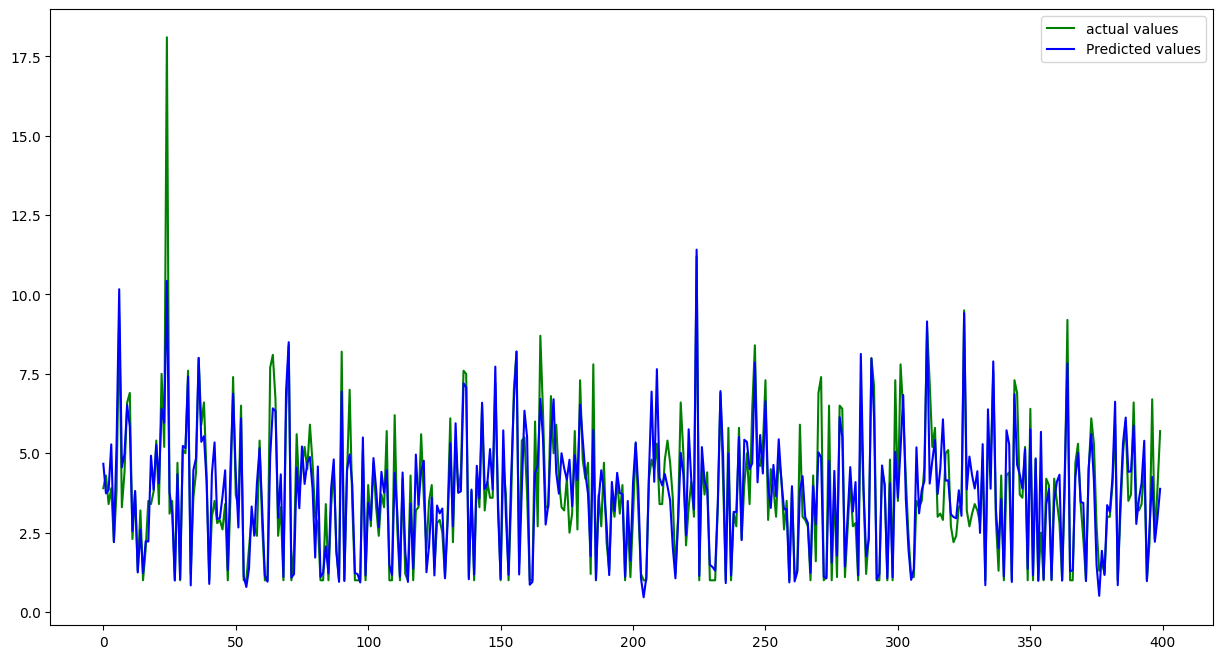

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test_short))],y_test_short, color = 'green',label="actual values")
plt.plot([i for i in range(len(y_test_short))],y_pred_short, color='blue', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()